In [1]:
from scipy import stats
import numpy as np

In [2]:
#help(stats.linregress)

In [3]:
import pandas as pd
import pandas_datareader as web

/opt/anaconda3/envs/pyfinance/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
spy_etf = web.DataReader('SPY', 'yahoo')

In [5]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-08,276.000000,265.250000,267.959991,274.029999,153774500.0,274.029999
2020-04-09,281.200012,275.470001,277.579987,278.200012,190282700.0,278.200012
2020-04-13,277.510010,271.410004,277.140015,275.660004,114839100.0,275.660004
2020-04-14,284.899994,275.510010,280.980011,283.790009,133659600.0,283.790009
2020-04-15,283.940704,275.459991,277.570007,277.929993,96531167.0,277.929993


In [6]:
start = pd.to_datetime('2015-04-17')
end = pd.to_datetime('2020-04-15')

### Costruzione del nostro portfolio:

In [7]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [8]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-17,126.139999,124.459999,125.550003,124.750000,51957000.0,114.802368
2015-04-20,128.119995,125.169998,125.570000,127.599998,47054300.0,117.425117
2015-04-21,128.199997,126.669998,128.100006,126.910004,32435100.0,116.790138
2015-04-22,128.869995,126.320000,126.989998,128.619995,37654500.0,118.363777
2015-04-23,130.419998,128.139999,128.300003,129.669998,45770900.0,119.330048


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

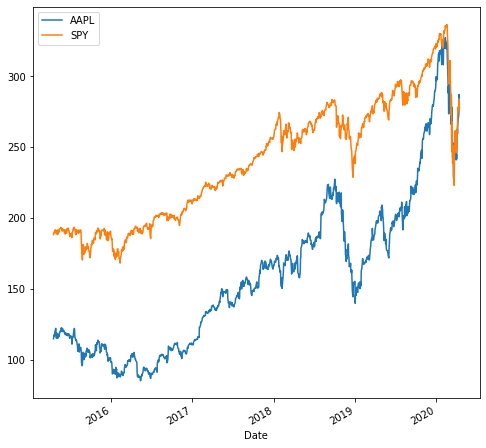

In [10]:
aapl['Adj Close'].plot(label='AAPL',figsize=(8,8))
spy_etf['Adj Close'].plot(label='SPY')
plt.legend()

### Cumulative return:

Indica se avessimo investito un dollaro allo `start` date quando avremmo ora

In [11]:
aapl['Cumulative'] = aapl['Adj Close'] / aapl['Adj Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Adj Close'] / spy_etf['Adj Close'].iloc[0]

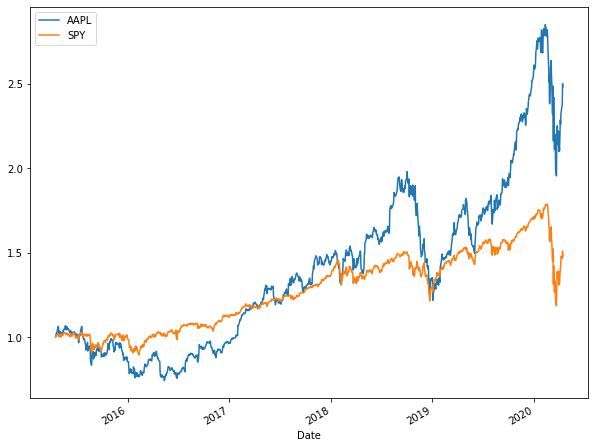

In [12]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [13]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)

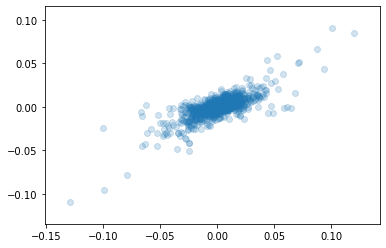

In [14]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.2)

In [15]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                         spy_etf['Daily Return'].iloc[1:])

In [16]:
beta

0.49260881909818016

In [17]:
alpha

-5.919447916564221e-05

In [18]:
# r_value indica quando ha fittato la linear regression (più alto è meglio è)
r_value

0.7684022863933669

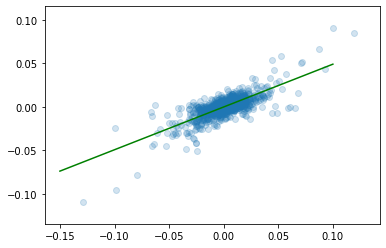

In [19]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.2)

x = np.linspace(-0.15,0.1,100)
y = beta*x+alpha
plt.plot(x, y, 'g', label='y=betax+alpha')

### Proviamo ad aggiungere del rumore allo SPY
In questo modo vediamo se comparato al vero spy_etf otteniamo un beta molto vicino ad 1 (ad indicare un'ottima correlazione con l'S&P500

In [20]:
#(mean,std,len)
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [21]:
noise

array([-0.00022672, -0.00122929, -0.0001335 , ..., -0.00063287,
       -0.00015351,  0.00098719])

In [22]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

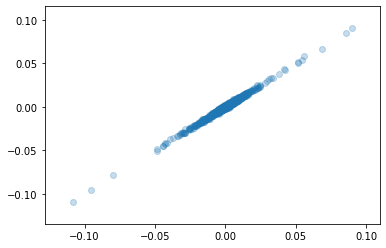

In [23]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:],alpha=0.25)

In [24]:
"""
Nella linear regression:
beta = slope della retta
alpha = termine noto
r_value = coefficiente di correlazione. Più è alto più significa che x ed y sono correlate (i.e., sono molto vicini tra loro)
"""
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock,
                                                         spy_etf['Daily Return'].iloc[1:])

In [25]:
beta

0.9955218113200074

In [26]:
alpha

-3.2300341484551762e-06

In [27]:
r_value

0.9963503210811695

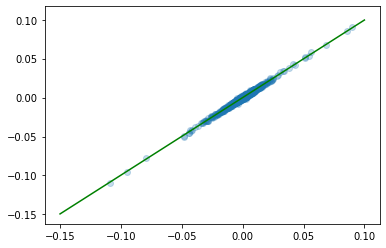

In [28]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:],alpha=0.25)

x = np.linspace(-0.15,0.1,100)
y = beta*x+alpha
plt.plot(x, y, 'g', label='y=betax+alpha')

### Se avessi beta=1 (e quindi alpha=0)

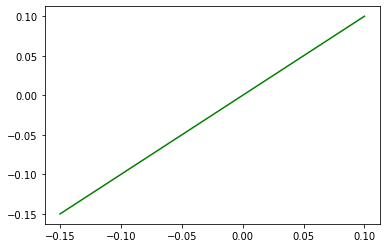

In [29]:
beta = 1
alpha = 0 # più il numero è diverso da 0 + mi discosto dall'origine
x = np.linspace(-0.15,0.1,100)
y = beta*x+alpha
plt.plot(x, y, 'g', label='y=betax+alpha')

## Test beta=2

In [30]:
fake_stock = spy_etf['Daily Return'].iloc[1:] * 2

In [31]:
fake_stock.head()

Date
2015-04-20    0.018274
2015-04-21   -0.002382
2015-04-22    0.009828
2015-04-23    0.005032
2015-04-24    0.004641
Name: Daily Return, dtype: float64

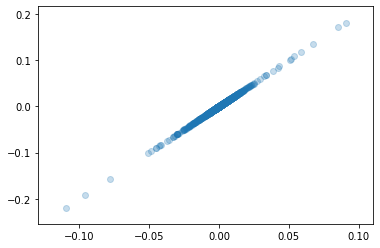

In [46]:
plt.scatter(spy_etf['Daily Return'].iloc[1:], fake_stock, alpha=0.25)
# occhio che è cambiata la scala sull'asse delle y

#plt.xticks(np.arange(-0.25, 0.1, 0.1))
#plt.yticks(np.arange(-0.25, 0.1, 0.1))

In [33]:
beta, alpha, r_value, p_value, std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:],
                                                          fake_stock)

In [34]:
beta

2.0

In [35]:
alpha

0.0

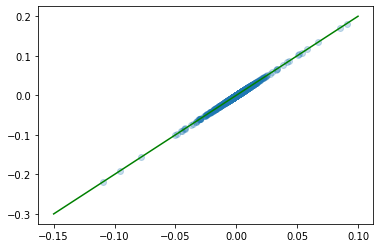

In [36]:
plt.scatter(spy_etf['Daily Return'].iloc[1:], fake_stock, alpha=0.25)

x = np.linspace(-0.15,0.1,100)
y = beta*x+alpha
plt.plot(x, y, 'g', label='y=betax+alpha')